# FIT 1043 Introduction to Data Science

## Assignment 2

### Harvey Koay Wern Shern

### 34046917



The main objective of this Assignment is to conduct predictive analytics by building predictive models on a dataset using Python in Jupyter Notebook. Thus, we will explore the following Data sets:

1. FIT1043-Essay-Features.csv
2. FIT1043-Essay-Features-Submission.csv

# Part A: Classification

# A1. Supervised learning

### Question 1

Supervised machine learning is where the algorithms learn to predict the output from the input data and all data is labelled where the goal is to estimate the mapping function to a point where you can predict the output variable when new input data is given for that data.

The notion of labelled data are data tagged by one or more categories to train and test models which are vital for supervised learning, and aiding in quality model training

Training Set: In data science, the training set is the chunk of data specifically reserved for teaching a machine learning model how to recognize patterns, relationships, or trends in the data. It is like a driving instructor teaching a new student how to drive.

Testing Set: The testing set, on the other hand, is another portion of data used to evaluate the model's performance. It's like testing the skills of a student after he learn to drive. 

### Question 2

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
dataset = pd.read_csv('FIT1043-Essay-Features.csv')

In [2]:
x = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1:].values
x

array([[1.45700000e+03, 2.15300000e+03, 4.26000000e+02, ...,
        2.46478873e-01, 4.24000000e+02, 4.12000000e+02],
       [5.03000000e+02, 1.48000000e+03, 2.92000000e+02, ...,
        2.63698630e-01, 3.56000000e+02, 3.45000000e+02],
       [2.53000000e+02, 3.96400000e+03, 8.49000000e+02, ...,
        1.53121319e-01, 7.50000000e+02, 7.50000000e+02],
       ...,
       [1.34500000e+03, 1.81400000e+03, 3.63000000e+02, ...,
        2.94765840e-01, 4.27000000e+02, 4.15000000e+02],
       [3.44000000e+02, 1.42700000e+03, 2.87000000e+02, ...,
        2.89198606e-01, 3.23000000e+02, 3.12000000e+02],
       [1.07700000e+03, 2.80600000e+03, 5.42000000e+02, ...,
        2.85977860e-01, 5.96000000e+02, 5.75000000e+02]])

In [3]:
y

array([[4],
       [4],
       [4],
       ...,
       [3],
       [3],
       [4]])

### Question 3

In [4]:
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state = 0)

# A2. Classification(training)

### Question 1

Binary classification is a type of supervised machine learning task where the objective is to sort data into two distinct and exclusive categories. These categories can be denoted as 0 and 1, positive and negative, or true and false. In binary classification, models are trained using a labeled dataset, which means the data is already categorized into the desired outcomes.

Multiclass classification is also a type of supervised machine learning and involves categorizing data into three or more distinct groups or categories. Unlike binary classification, where the model makes a choice between just two classes for each data point, a multiclass classifier is trained to make predictions among three or more classes for each data point.



### Question 2a

Objective functions may not work properly in some machine learning algorithms without feature scaling as the range of values of raw data varies widely. The range of all the features should be normalised or scaled in order for each of them to contribute to the final distance uniformly.

### Question 2b

We fit_transform the training set but not the test set to scale to have a mean of 0 and a certain standard deviation which will be stored in the StandardScaler() and applied to the testing dataset using transform() function

In [5]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

### Question 3a

Support Vector Machines (SVMs) represent a versatile set of supervised learning techniques. They find applications in tasks like classification, regression, and identifying outliers. SVMs excel at drawing decision boundaries in data, making them valuable in various data analysis scenarios.

### Question 3b

In SVMs, kernels are mathematical tools that transform data into a higher-dimensional space to find more complex decision boundaries, making it useful for nonlinear classification problems. Common kernels include linear, polynomial, Gaussian (RBF), and sigmoid. The choice of kernel depends on the data and problem.

### Question 3c

#### Support Vector Machine algorithm

In [6]:
from sklearn import svm
y_train = np.ravel(y_train)
clf = svm.SVC()
clf.fit(X_train, y_train)

SVC()

### Question 4

#### Decision Tree Classification 

In [7]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(
    criterion = 'entropy', random_state = 0
)
classifier.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=0)

# A3. Classification (prediction)

### Question 1

#### Support Vector Machine algorithm

In [8]:
y_pred1 = clf.predict(X_test)
y_pred1

array([4, 3, 3, 3, 3, 4, 4, 4, 2, 4, 4, 3, 4, 3, 3, 4, 3, 4, 4, 4, 3, 4,
       3, 3, 3, 4, 4, 4, 3, 3, 4, 3, 3, 4, 4, 3, 4, 4, 3, 3, 4, 2, 3, 3,
       3, 3, 3, 3, 2, 3, 4, 3, 4, 4, 4, 4, 4, 3, 3, 4, 3, 4, 3, 3, 4, 4,
       4, 4, 3, 4, 3, 3, 4, 5, 4, 3, 3, 4, 4, 3, 4, 3, 4, 3, 3, 4, 4, 3,
       4, 4, 3, 4, 4, 3, 4, 4, 3, 3, 3, 2, 4, 4, 3, 4, 4, 2, 4, 4, 3, 4,
       2, 3, 3, 4, 3, 4, 3, 4, 3, 3, 3, 3, 4, 4, 4, 3, 3, 4, 4, 4, 4, 4,
       4, 3, 4, 3, 3, 4, 4, 3, 4, 4, 4, 3, 3, 3, 3, 3, 4, 4, 4, 3, 4, 4,
       4, 3, 3, 3, 4, 3, 4, 4, 3, 3, 4, 4, 4, 4, 3, 3, 3, 3, 3, 2, 4, 3,
       4, 4, 4, 2, 3, 4, 4, 3, 3, 4, 3, 3, 3, 3, 3, 4, 3, 3, 2, 3, 4, 4,
       3, 4, 3, 4, 4, 3, 3, 4, 3, 3, 3, 3, 4, 4, 3, 3, 3, 3, 4, 4, 3, 3,
       4, 4, 4, 4, 4, 3, 3, 4, 3, 3, 3, 3, 4, 3, 3, 4, 4, 4, 4, 4, 4, 4,
       3, 3, 3, 4, 4, 3, 4, 4, 3, 4, 3, 4, 4, 4, 3, 2, 2, 3, 3, 3, 4, 3,
       3, 3, 4, 4, 4, 3, 3, 4, 3, 4, 4, 3, 3, 3, 4, 3, 4, 4, 2, 3, 4, 3,
       3, 3, 4, 4, 4, 4, 3, 4, 3, 3, 4, 4, 4, 3, 3,

#### Decision Tree Classification 

In [9]:
y_pred2 = classifier.predict(X_test)
y_pred2

array([4, 3, 2, 3, 4, 4, 4, 4, 3, 4, 4, 2, 4, 3, 3, 4, 3, 4, 4, 4, 3, 3,
       3, 3, 3, 4, 4, 4, 3, 3, 3, 3, 3, 4, 4, 2, 4, 4, 3, 3, 4, 2, 3, 3,
       3, 3, 3, 3, 2, 3, 4, 4, 4, 3, 4, 4, 3, 3, 3, 4, 3, 4, 3, 3, 5, 4,
       3, 4, 4, 4, 4, 4, 4, 5, 4, 3, 3, 4, 4, 3, 4, 3, 4, 3, 4, 4, 4, 3,
       4, 3, 3, 4, 4, 3, 4, 4, 3, 3, 3, 2, 4, 3, 3, 5, 4, 1, 4, 5, 4, 4,
       3, 3, 3, 4, 2, 4, 3, 4, 3, 4, 3, 3, 4, 4, 3, 2, 3, 3, 4, 3, 4, 4,
       4, 4, 4, 3, 3, 4, 4, 2, 4, 4, 4, 3, 3, 3, 3, 3, 4, 4, 4, 2, 4, 4,
       4, 3, 2, 3, 4, 3, 3, 4, 3, 3, 4, 4, 3, 4, 4, 3, 3, 3, 3, 2, 4, 3,
       4, 3, 4, 2, 3, 4, 3, 3, 3, 4, 3, 3, 3, 3, 3, 4, 4, 3, 2, 3, 4, 4,
       3, 4, 4, 3, 3, 3, 3, 4, 4, 3, 2, 3, 3, 4, 4, 3, 3, 4, 3, 5, 3, 3,
       3, 4, 4, 4, 4, 3, 3, 4, 3, 3, 4, 2, 4, 3, 3, 4, 4, 4, 4, 3, 3, 3,
       3, 3, 2, 3, 4, 4, 4, 4, 3, 4, 3, 3, 4, 4, 3, 2, 2, 3, 3, 3, 4, 3,
       3, 3, 4, 3, 5, 3, 3, 4, 3, 4, 4, 3, 3, 4, 4, 4, 4, 4, 2, 3, 4, 3,
       2, 3, 4, 4, 3, 4, 2, 5, 3, 3, 4, 4, 4, 3, 3,

### Question 2

#### Support Vector Machine algorithm

In [10]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred1)
cm

array([[  0,   2,   0,   0,   0,   0],
       [  0,   8,  14,   1,   0,   0],
       [  0,   2, 102,  43,   0,   0],
       [  0,   0,  37, 106,   1,   0],
       [  0,   0,   1,  15,   0,   0],
       [  0,   0,   0,   1,   0,   0]])

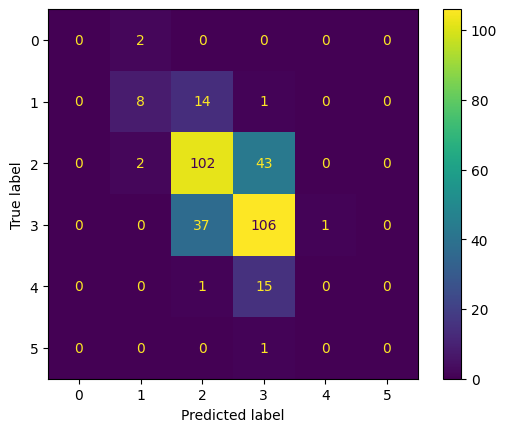

In [11]:
from sklearn.metrics import ConfusionMatrixDisplay
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels = [0,1,2,3,4,5])
disp.plot()

#### Decision Tree Classification 

In [12]:
cm = confusion_matrix(y_test, y_pred2)
cm

array([[ 0,  2,  0,  0,  0,  0],
       [ 0,  7, 14,  2,  0,  0],
       [ 1, 11, 90, 42,  3,  0],
       [ 0,  3, 46, 89,  6,  0],
       [ 0,  0,  2, 12,  2,  0],
       [ 0,  0,  0,  1,  0,  0]])

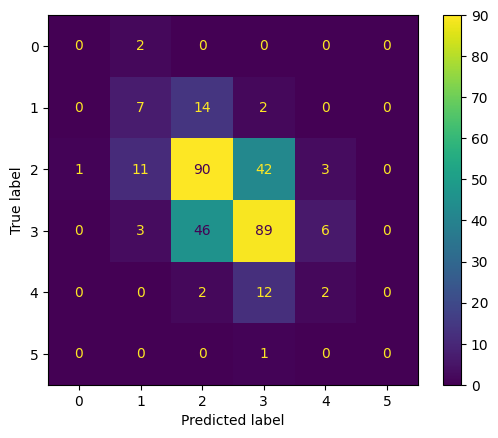

In [13]:
from sklearn.metrics import ConfusionMatrixDisplay
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels = [0,1,2,3,4,5])
disp.plot()

### Question 3

#### Support Vector Machine algorithm

Micro F1-Score

Net TP = 8+102+106 = 216

Net FP = 2 + (14+1) + (2+43) + (37+1) + (1+15) + 1 = 117
Net FN = FP

Micro Precision = Net TP/(Net TP + Net FP) = 216/(216+117) = 64.86%

Macro F1-Score
Precision = TP/ (TP + FP)
- For class 0: Precision = 0 / (0+2) = 0% 
- For class 1: Precision = 8 / (8+14+1) = 34.78% 
- For class 2: Precision = 102 / (102+2+43) = 69.39% 
- For class 3: Precision = 106 / (37+106+1) = 73.61% 
- For class 4: Precision = 0/ (1+15) = 0% 
- For class 5: Precision = 0/ (0+1) = 0% 

Macro Precision: (0 + 34.78 + 69.39 + 73.61 + 0 + 0) / 6 = 29.63% (approximately)


#### Decision Tree Classification 

Micro F1-Score

Net TP = 7+90+89+2 = 188

Net FP = 2 + (14+2) + (1+11+42+3) + (3+46+6) + (2+12) + 1 = 145

Net FN = FP

Micro precision = Net TP/(Net TP + Net FP) = 188/(188+145) = 56.46%

Macro F1-Score
Precision = TP/ (TP + FP)
- For class 0: Precision = 0 / (0+2) = 0% 
- For class 1: Precision = 7 / (7+14+2) = 30.43% 
- For class 2: Precision = 90 / (90+1+11+42+3) = 61.22% 
- For class 3: Precision = 89 / (89+3+46+6) = 61.81% 
- For class 4: Precision = 2/ (2+12+2) = 12.5% 
- For class 5: Precision = 0/ (0+1) = 0% 

Macro Precision: (0 + 30.43 + 61.22 + 61.81 + 12.5 + 0) / 6 = 27.66% (approximately)


Based on my above calculation of both micro and macro precision, i have concluded that the precision of the Support Vector machine is better in both scenarios and thus it performed better overall. This is also due to thehigher TP to FP ratio as we can see from the above calculation.


In [14]:
dataset = pd.read_csv('FIT1043-Essay-Features-Submission.csv')
dataset


,essayid,chars,words,commas,apostrophes,punctuations,avg_word_length,sentences,questions,avg_word_sentence,POS,POS/total_words,prompt_words,prompt_words/total_words,synonym_words,synonym_words/total_words,unstemmed,stemmed
0,1623,4332,900,28,13,0,4.813333,39,1,23.076923,893.988852,0.993321,392,0.435556,196,0.217778,750,750
1,1143,1465,280,11,3,1,5.232143,14,3,20.000000,278.321343,0.994005,131,0.467857,51,0.182143,339,316
2,660,1696,325,17,2,0,5.218462,19,1,17.105263,321.316770,0.988667,178,0.547692,92,0.283077,352,337
3,1596,2640,555,20,17,0,4.756757,28,0,19.821429,551.989150,0.994575,228,0.410811,107,0.192793,632,605
4,846,2844,596,33,4,1,4.771812,24,9,24.833333,593.658810,0.996072,279,0.468121,138,0.231544,626,607
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
194,1226,1208,242,8,8,0,4.991736,13,0,18.615385,237.327684,0.980693,135,0.557851,58,0.239669,244,242
195,862,4039,817,24,11,1,4.943696,47,2,17.382979,812.656033,0.994683,386,0.472460,210,0.257038,750,750
196,1562,2448,468,22,7,0,5.230769,22,0,21.272727,465.656652,0.994993,224,0.478632,101,0.215812,540,526
197,1336,1081,214,14,5,0,5.051402,11,0,19.454545,212.990566,0.995283,114,0.532710,63,0.294393,259,256


In [15]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_test = sc.fit_transform(dataset)

In [16]:
y_pred_sub = clf.predict(X_test)
y_pred_sub

array([4, 3, 3, 4, 4, 3, 3, 3, 3, 3, 3, 4, 4, 3, 4, 3, 4, 4, 3, 3, 3, 3,
       4, 4, 4, 4, 4, 4, 4, 3, 3, 4, 3, 3, 4, 3, 4, 4, 3, 3, 3, 3, 3, 3,
       2, 3, 3, 4, 4, 3, 3, 4, 4, 4, 3, 4, 3, 4, 4, 4, 2, 4, 3, 4, 3, 3,
       4, 4, 3, 4, 3, 4, 4, 3, 3, 3, 3, 3, 4, 4, 4, 4, 4, 3, 4, 2, 4, 4,
       2, 3, 3, 3, 4, 3, 4, 4, 4, 4, 3, 3, 3, 4, 2, 3, 3, 4, 3, 3, 4, 4,
       4, 3, 4, 4, 4, 3, 3, 4, 2, 3, 4, 4, 4, 3, 3, 4, 3, 4, 4, 3, 4, 4,
       2, 3, 4, 4, 3, 4, 2, 4, 4, 4, 4, 3, 3, 4, 4, 3, 4, 4, 4, 3, 4, 3,
       4, 3, 3, 3, 3, 4, 4, 3, 2, 2, 4, 4, 3, 3, 2, 4, 3, 4, 3, 3, 4, 4,
       4, 3, 3, 4, 4, 2, 4, 4, 4, 4, 3, 3, 3, 3, 3, 4, 3, 4, 3, 4, 4, 3,
       3])

# Part B : Selection of Dataset, Clustering and Video Preparation

## B1. Selection of a Dataset with missing data, Clustering

### Question 1

The data set i am going to use from kaggle.com is https://www.kaggle.com/datasets/iamsouravbanerjee/animal-information-dataset


In [57]:
df = pd.read_csv('Animal Dataset.csv')
df

,Animal,Height (cm),Weight (kg),Color,Lifespan (years),Diet,Habitat,Predators,Average Speed (km/h),Countries Found,Conservation Status,Family,Gestation Period (days),Top Speed (km/h),Social Structure,Offspring per Birth
0,Aardvark,105-130,40-65,Grey,20-30,Insectivore,"Savannas, Grasslands","Lions, Hyenas",40,Africa,Least Concern,Orycteropodidae,210-240,40,Solitary,1
1,Aardwolf,40-50,8-14,Yellow-brown,10-12,Insectivore,"Grasslands, Savannas","Lions, Leopards",24-30,Eastern and Southern Africa,Least Concern,Hyaenidae,90,40,Solitary,2-5
2,African Elephant,270-310,2700-6000,Grey,60-70,Herbivore,"Savannah, Forest","Lions, Hyenas",25,Africa,Vulnerable,Elephantidae,640-660,40,Herd-based,1
3,African Lion,80-110,120-250,Tan,10-14,Carnivore,"Grasslands, Savannas","Hyenas, Crocodiles",58,Africa,Vulnerable,Felidae,98-105,80,Group-based,2-4 (usually)
4,African Wild Dog,75-80,18-36,Multicolored,10-12,Carnivore,Savannahs,"Lions, Hyenas",56,Sub-Saharan Africa,Endangered,Canidae,70,56,Group-based,10-12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,Yak,140-160,500-1200,"Brown, Black",20-25,Herbivore,Mountains,"Snow Leopards, Wolves",24,"Himalayas, Central Asia",Least Concern,Bovidae,215-280,24,Group-based,10-50
201,Yellow-Eyed Penguin,60-65,1-3,"Yellow, White",Up to 20,Carnivore,Coastal Areas,"Seals, Orcas",25,New Zealand,Endangered,Spheniscidae,80-90,25,Solitary,1
202,Yeti Crab,Up to 15,Up to 0.5,"White, Hairy",Up to 20,Omnivore,Hydrothermal Vents,Not Applicable,Not Applicable,Pacific Ocean,Not Evaluated,Kiwaidae,Not Applicable,Not Applicable,Solitary,Not Applicable
203,Zebra,220-340,400-900,"Black, White",20-25,Herbivore,Grasslands,"Lions, Hyenas",25,Africa,Least Concern,Equidae,180-365,25,Group-based,5-20


### Question 2

From the dataframe above, i am going to wrangle on the dataset to handle the missing data for the average and top speed as we are going to use these two numerical features for k-means clustering

In [58]:
# First we check the average speed of the list
print(df['Average Speed (km/h)'].tolist())


['40', '24-30', '25', '58', '56', '56-64', '0.1-1', '40-56', '24', '65', '55', '60', '16-32', '40', '30-50', '40-64', '24-40', '0.8', '32', '48', '120', '16', '30', '14-28', '40-64', '40', '65', '56', 'Not Applicable', 'Not Applicable', '32', 'Not Applicable', '40', '25-35', 'Not Applicable', '40-60', '40-64', '37', '64', 'Not Applicable', '48', '1.6-2.4', '30-35', '112', '40', 'Not Applicable', '8', '1.6', '60', 'Not Applicable', '30-45', '40-45', '56', '48-64', '10-15', '40', '16-56', 'Not Applicable', '2-2.5', '32', '4-6', '32', '0.8', '40-50', '45-48', '29', '24-35', '6-7', '0.3-0.5', 'Varies', '30-40', '55', '32', '24', '32', '1-2', '0.8', '1.6-3', 'Not Applicable', '8-13', '0.3', '56', '56', '16-24 (in water)', '1.6-3.2', '35', '64', '0.8', 'Not Applicable', '19-22', '50', '25', '0.8-1.6', '40-80', '24-27', '70-80', '24-27', '40-58', '30', '2.5', '16', '20', '6.4-9.6', '20', '0.8-1', 'Not Applicable', '24-29', '29', '30-40', '0.02-0.03', 'Not Applicable', 'Not Applicable', '8', '

After seeing the above values we can see that some of the average speed are not applicable, varies and one even in water. Thus, I am to clean this data to prepare for the clustering

In [59]:
# Removing the 'Not Applicable' and 'Varies' values
df = df[df['Average Speed (km/h)'] != 'Not Applicable']
df = df[df['Average Speed (km/h)'] != 'Varies']

# In this case, I use try and except to handle the (in water)
def calculate_average(speed):
    try:
        if '-' in speed:
            values = speed.split('-')
            average = (float(values[0]) + float(values[1])) / 2
            return average
        else:
            return float(speed)
    except(ValueError):
        # When the (in water values) is passed
        # only the first two numbers are added back to 24 as it is a string
        num2 = (values[1][0]) + (values[1][1])
        # Then converted to float and getting the average between these two values
        average = (float(values[0]) + float(num2)) /2
        return average

# Apply the calculate_average function to the 'Average Speed' column
df['Average Speed (km/h)'] = df['Average Speed (km/h)'].apply(calculate_average)


In [60]:
print(df['Average Speed (km/h)'].tolist())


[40.0, 27.0, 25.0, 58.0, 56.0, 60.0, 0.55, 48.0, 24.0, 65.0, 55.0, 60.0, 24.0, 40.0, 40.0, 52.0, 32.0, 0.8, 32.0, 48.0, 120.0, 16.0, 30.0, 21.0, 52.0, 40.0, 65.0, 56.0, 32.0, 40.0, 30.0, 50.0, 52.0, 37.0, 64.0, 48.0, 2.0, 32.5, 112.0, 40.0, 8.0, 1.6, 60.0, 37.5, 42.5, 56.0, 56.0, 12.5, 40.0, 36.0, 2.25, 32.0, 5.0, 32.0, 0.8, 45.0, 46.5, 29.0, 29.5, 6.5, 0.4, 35.0, 55.0, 32.0, 24.0, 32.0, 1.5, 0.8, 2.3, 10.5, 0.3, 56.0, 56.0, 20.0, 2.4000000000000004, 35.0, 64.0, 0.8, 20.5, 50.0, 25.0, 1.2000000000000002, 60.0, 25.5, 75.0, 25.5, 49.0, 30.0, 2.5, 16.0, 20.0, 8.0, 20.0, 0.9, 26.5, 29.0, 35.0, 0.025, 8.0, 30.0, 56.0, 40.0, 52.0, 32.0, 40.0, 0.055, 45.0, 8.0, 56.0, 58.0, 9.0, 32.0, 30.0, 72.0, 0.8, 5.0, 40.0, 20.0, 0.6, 28.0, 88.5, 8.0, 24.0, 48.0, 56.0, 0.30000000000000004, 35.0, 26.0, 24.0, 44.0, 15.0, 45.0, 57.5, 0.135, 50.0, 80.0, 45.0, 60.0, 45.0, 60.0, 30.0, 1.2, 35.0, 40.0, 52.0, 24.0, 44.0, 48.0, 45.0, 16.0, 56.0, 0.24, 20.0, 45.0, 28.0, 27.0, 35.5, 30.0, 0.03, 17.0, 20.0, 32.0, 40.

Thus we can see that in the above values after wragling on the data, we have solved the missing data and I am going to do the same for top speed

In [62]:
df = df[df['Top Speed (km/h)'] != 'Not Applicable']

def calculate_average(speed):
    if '-' in speed:
        values = speed.split('-')
        average = (float(values[0]) + float(values[1])) / 2
        return average
    else:
        return float(speed)

# Apply the calculate_average function to the 'Average Speed' column
df['Top Speed (km/h)'] = df['Top Speed (km/h)'].apply(calculate_average)

In [63]:
print(df['Top Speed (km/h)'].tolist())

[40.0, 40.0, 40.0, 80.0, 56.0, 60.0, 0.8, 56.0, 24.0, 65.0, 55.0, 60.0, 32.0, 40.0, 80.0, 52.0, 32.0, 0.25, 32.0, 48.0, 120.0, 16.0, 30.0, 21.0, 52.0, 40.0, 65.0, 56.0, 32.0, 39.0, 30.0, 50.0, 52.0, 64.0, 64.0, 48.0, 2.0, 35.0, 112.0, 40.0, 1.6, 60.0, 30.0, 37.0, 56.0, 56.0, 27.0, 40.0, 36.0, 9.0, 32.0, 5.0, 32.0, 0.8, 45.0, 46.5, 29.0, 29.5, 35.0, 0.3, 35.0, 95.0, 32.0, 24.0, 32.0, 10.5, 0.3, 56.0, 56.0, 24.0, 35.0, 35.0, 64.0, 28.0, 50.0, 30.0, 80.0, 25.5, 75.0, 25.5, 30.0, 2.4, 16.0, 20.0, 9.0, 20.0, 29.0, 29.0, 35.0, 8.0, 30.0, 56.0, 40.0, 52.0, 32.0, 40.0, 45.0, 8.0, 58.0, 58.0, 40.0, 32.0, 30.0, 72.0, 0.8, 9.0, 40.0, 20.0, 28.0, 88.5, 8.0, 24.0, 48.0, 56.0, 0.30000000000000004, 32.0, 26.0, 32.0, 44.0, 15.0, 45.0, 48.0, 0.135, 50.0, 80.0, 45.0, 60.0, 45.0, 56.0, 30.0, 1.2, 35.0, 40.0, 40.0, 24.0, 44.0, 48.0, 45.0, 16.0, 56.0, 20.0, 45.0, 28.0, 27.0, 60.0, 30.0, 17.0, 20.0, 32.0, 40.0, 20.0, 40.0, 40.0, 40.0, 70.0, 45.0, 22.0, 20.0, 47.0, 45.0, 63.0, 20.0, 24.0, 25.0, 25.0, 20.0]


Finally, we have successfully done data wrangling and we can proceed to K-means clustering

### Question 3

In [64]:
# Run the K-means clustering over the dataset using only 
# Average speed and top speed. Set K=4: we only want 
# to cluster the dataset into four subgroups

In [65]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=4).fit(
    df[['Average Speed (km/h)','Top Speed (km/h)']])

/Users/harveykoay/anaconda3/envs/Rp_Env/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [66]:
# Checking the Two cluster centers
kmeans.cluster_centers_

array([[ 5.64729167,  5.849375  ],
       [26.01384615, 28.5       ],
       [71.96875   , 79.59375   ],
       [48.2295082 , 48.71311475]])

In [67]:
# Checking the Cluster labels
kmeans.labels_

array([3, 1, 1, 2, 3, 3, 0, 3, 1, 2, 3, 3, 1, 3, 2, 3, 1, 0, 1, 3, 2, 0,
       1, 1, 3, 3, 2, 3, 1, 3, 1, 3, 3, 3, 2, 3, 0, 1, 2, 3, 0, 3, 1, 3,
       3, 3, 1, 3, 1, 0, 1, 0, 1, 0, 3, 3, 1, 1, 1, 0, 1, 2, 1, 1, 1, 0,
       0, 3, 3, 1, 1, 1, 2, 1, 3, 1, 2, 1, 2, 1, 1, 0, 0, 1, 0, 1, 1, 1,
       1, 0, 1, 3, 3, 3, 1, 3, 3, 0, 3, 3, 1, 1, 1, 2, 0, 0, 3, 1, 1, 2,
       0, 1, 3, 3, 0, 1, 1, 1, 3, 0, 3, 3, 0, 3, 2, 3, 3, 3, 3, 1, 0, 1,
       3, 3, 1, 3, 3, 3, 0, 3, 1, 3, 1, 1, 3, 1, 1, 1, 1, 3, 1, 3, 3, 3,
       2, 3, 1, 1, 3, 3, 2, 1, 1, 1, 1, 1], dtype=int32)

### Question 4

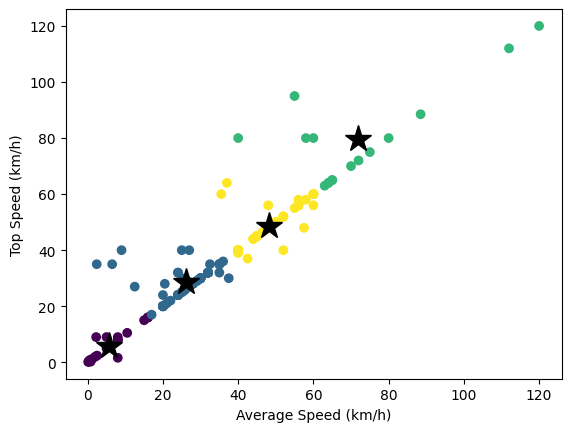

In [68]:
# Visualise the output labels
plt.scatter(
    x=df['Average Speed (km/h)'],
    y=df['Top Speed (km/h)'],
    c=kmeans.labels_)
# Visualising the cluster centers (black stars) 
plt.plot(
    kmeans.cluster_centers_[:,0],
    kmeans.cluster_centers_[:,1],
    'k*',
    markersize=20
)
plt.xlabel('Average Speed (km/h)')
plt.ylabel('Top Speed (km/h)')
plt.show()